In [1]:
import sumie
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

%load_ext autoreload

%autoreload 2

In [18]:
model = torchvision.models.inception_v3(pretrained=True, transform_input=False).eval()
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

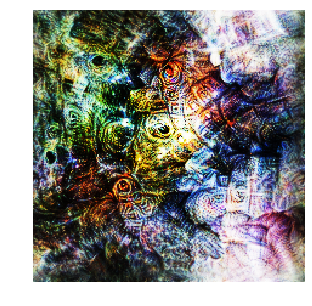

In [22]:
im = sumie.Image(224, transforms=
              [sumie.transforms.PositionJitter(8),
              sumie.transforms.Normalise()]
            )

device = 'cuda'
im.to(device)
model.to(device)
opt = sumie.Optimiser()
channel = sumie.objectives.ConvChannel(model.Mixed_7c.branch_pool.conv, 0)

opt.run(im, model, channel, iterations=200)
sumie.vis.show(im.get_image())

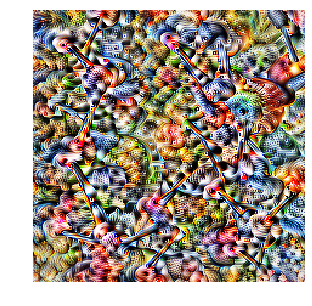

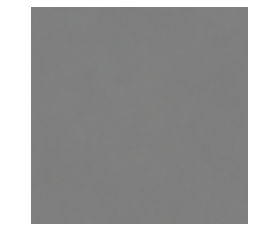

In [23]:
def to_frame(i):
  return animation[i,:,:,:].squeeze(0).permute((1, 2, 0)).numpy()

fig = plt.figure()
ax = plt.axes(xlim=(0, 224), ylim=(0, 224))
plt.axis('off')
ax.grid(False)
im=plt.imshow(to_frame(0))

# initialization function: plot the background of each frame
def init():
    im.set_data(to_frame(0))
    return [im]

# animation function.  This is called sequentially
def animate(i):
  if i<100:
    im.set_array(to_frame(i))
  else:
    im.set_array(to_frame(199-i))
  return [im]
  
anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True, repeat=True)
#HTML(anim.to_jshtml())

In [24]:
HTML(anim.to_html5_video())